In [ ]:
# Import libraries and define required functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

def predict(X, w):
  return X * w

def loss(X, Y, w):
  return np.average((predict(X, w) - Y) ** 2)

In [68]:
# Load data from pizza.txt
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

85.9586546146667


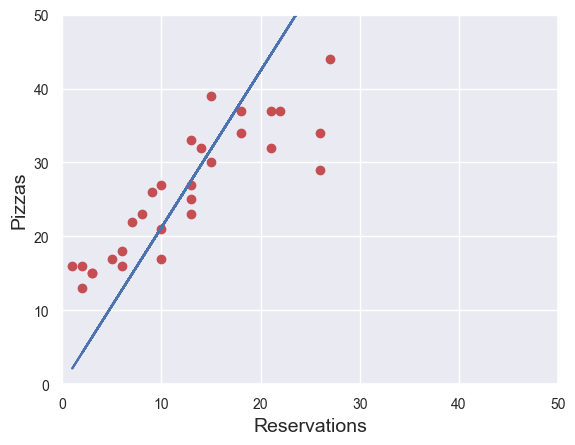

In [49]:
# Guess a weight and calculate the average loss
weight = 2.1211
error = loss(X, Y, weight)
print(error)

# Plot the data
sea.set_theme()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)
plt.plot(X, Y, "ro")
plt.plot(X, predict(X, weight))
plt.show()

In [69]:
# Train
# calculate the correct (or closest possible?) weight from the values in X and Y

# iterations = max number of iterations to determine the weight
# lr = learning rate (step size)
def train(X, Y, iterations, lr) -> float:
  # starting weight
  w = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w)
    print("Iteration %4d => Weight: %.6f => Loss: %.6f" % (i, w, current_loss))

    # does adding a step to w reduce the loss?
    if loss(X, Y, w + lr) < current_loss:
      w += lr
    # does subtracting a step from w reduce the loss?
    elif loss(X, Y, w - lr) < current_loss:
      w -= lr
    # if a step in neither direction doesn't improve the loss, return the closest weight we can
    else:
      return w
  
  raise Exception("Couldn't converge within %4d iterations" % iterations)

In [70]:
# Train the system
max_iterations = 10_000
learning_rate = 0.001
got_weight = train(X, Y, max_iterations, learning_rate)
print("Resulting weight:", got_weight)

Iteration    0 => Weight: 0.000000 => Loss: 812.866667
Iteration    1 => Weight: 0.001000 => Loss: 812.060085
Iteration    2 => Weight: 0.002000 => Loss: 811.253942
Iteration    3 => Weight: 0.003000 => Loss: 810.448236
Iteration    4 => Weight: 0.004000 => Loss: 809.642967
Iteration    5 => Weight: 0.005000 => Loss: 808.838137
Iteration    6 => Weight: 0.006000 => Loss: 808.033743
Iteration    7 => Weight: 0.007000 => Loss: 807.229788
Iteration    8 => Weight: 0.008000 => Loss: 806.426270
Iteration    9 => Weight: 0.009000 => Loss: 805.623189
Iteration   10 => Weight: 0.010000 => Loss: 804.820547
Iteration   11 => Weight: 0.011000 => Loss: 804.018341
Iteration   12 => Weight: 0.012000 => Loss: 803.216574
Iteration   13 => Weight: 0.013000 => Loss: 802.415244
Iteration   14 => Weight: 0.014000 => Loss: 801.614351
Iteration   15 => Weight: 0.015000 => Loss: 800.813897
Iteration   16 => Weight: 0.016000 => Loss: 800.013879
Iteration   17 => Weight: 0.017000 => Loss: 799.214300
Iteration 

In [71]:
# Predict the number of pizzas
reservations = 20
print("Prediction: x=%d => y=%.2f" % (reservations, predict(20, got_weight)))

Prediction: x=20 => y=36.88


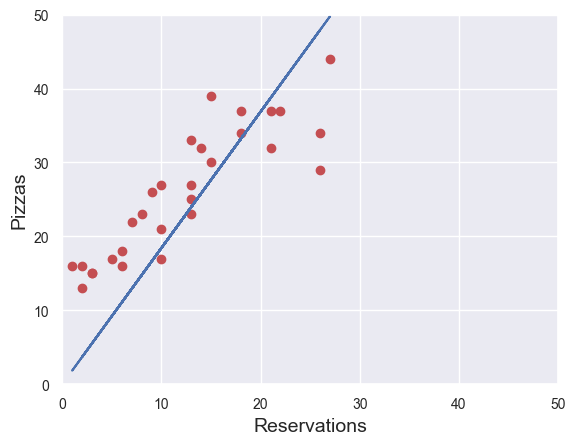

In [75]:
# Plot the graph with the learned weight
sea.set_theme()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)
plt.plot(X, Y, "ro")
plt.plot(X, predict(X, got_weight))
plt.show()